# Battle of Neighbors_Best Venue for a Restaurant in Virginia Beach,VA¶


## Introduction/Business Problem


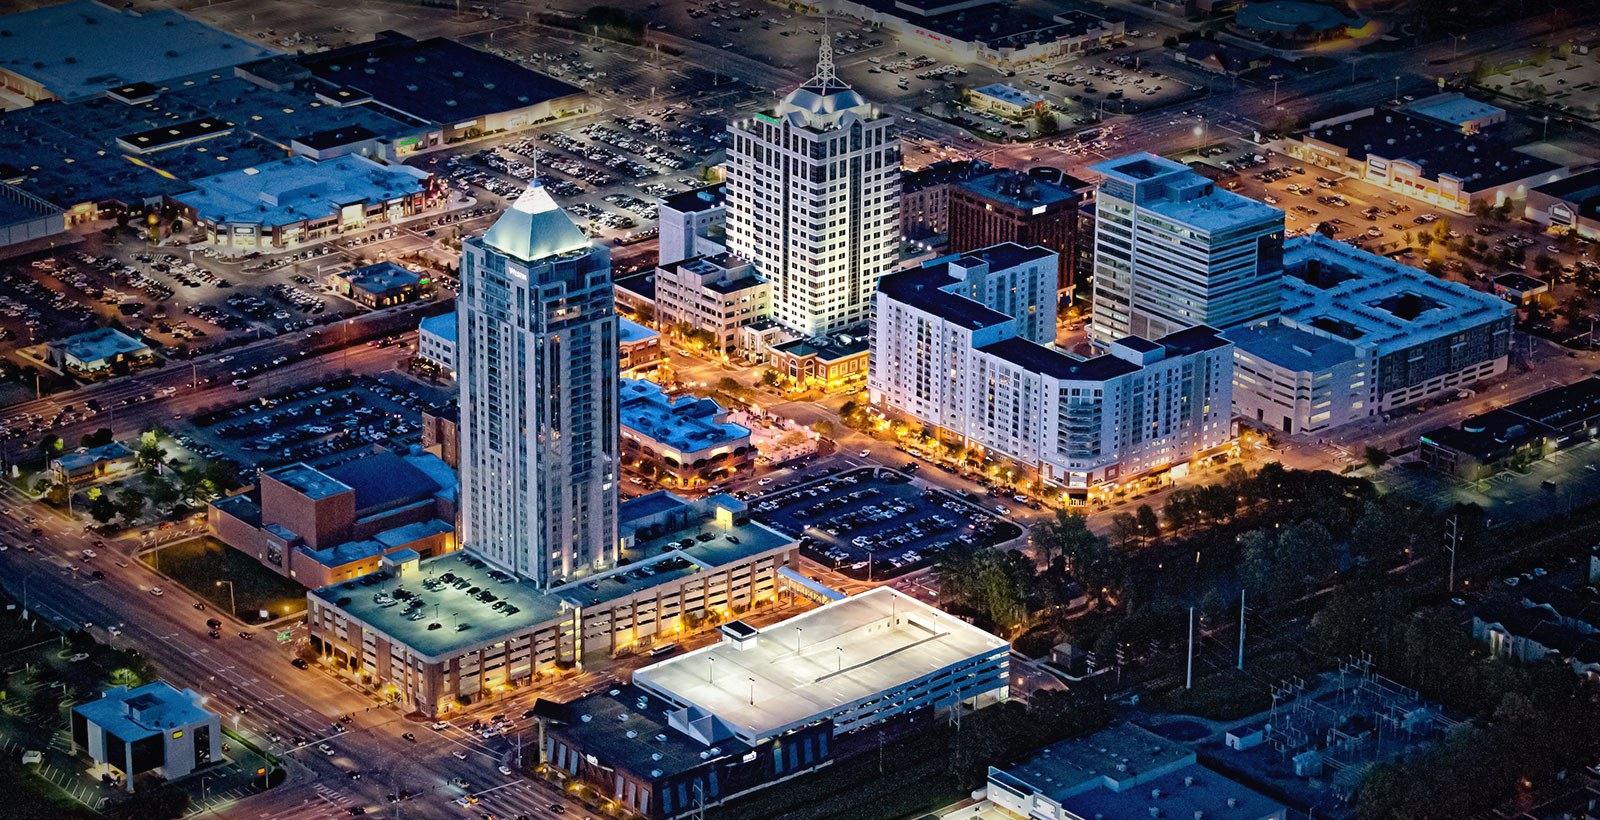

* __One of my collegues (TARGET AUDIENCE)__ decided to retire from though office environment and would like to open a small lovely restaurant in __Virginia Beach,VA__. He is really good at cooking and has intention to take this opportunity and make his life after this point. 
* According to __[areavibes](https://www.areavibes.com/library/best-places-to-live/Virginia Beach)__ which ranks the cities livability depending on a couple of attributes (like Amenities, Cost of Living, Crime, Education etc.) Virginia Beach is the 2nd bestcity among all others in US. So this is one of the best place to live even after retirement. 
* Since he has ben living in the city for 20+ years, he kows the city in detail but now he should look for the best   venue and type of the restaurant as a business. So he needs a professional help on this problem. 

* There are two __BUSINESS PROBLEMS__ we must handle with in this situation:
    
    * Which neighborhood will be the best to start off a restaurant?
    * What type of restaurant will be much more profittable?
    





## A description of the data

* We will use Virginia Beach borough name and coordinates which we found in __[https://en.wikipedia.org/wiki/Category:Boroughs_of_Virginia_Beach,_Virginia](wikipedia)__ VA Beach is divided into __6 boroughs__ :
    * Bayside
    * Kempsville
    * Lynnhaven
    * Princess Anne
    * Pungo and
    * Oceanfront


* After creating the dataframe of boroughs with related coordinates, we may use __[https://developer.foursquare.com](Foursquare API)__ to explore each borough to get valuable information like __most common venues__ for each area.


* Then we can analyze each boroughs with the common venues based on the category.


* When we figure out the most common restaurant type, we may start to name our new firm.


* We can segregate the neighborhoods depending on the restaurant density an find the one with less density but also has enough business and market venues which will assure crowd people to get enough profit.

* After  data preprocessing phase, we will utilize __K-means algorithm__ to group the areas into clusters to explore common venues and their frequency for each area. 

### Importing Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

from bs4 import BeautifulSoup
import requests
import csv

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!conda install -c conda-forge geocoder --yes # install geocoder
import geocoder

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_0          52 KB  conda-forge
    orderedset-2.0.1           |           py36_0          74 KB  conda-forge
    ratelim-0.1.6              |           py36_0           5 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         132 KB

The following NEW packages will be INSTALLED:

    geocoder:   1.38.1-py_0  conda-forge
    orderedset: 2.0.1-py36_0 conda-forge
    ratelim:    0.1.6-py36_0 conda-forge


geocoder-1.38.1      | 52 KB     | ##############

!pip install uszipcode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

In [13]:
# Creating the dataframe of boroughs and their coordinates.

d = {'Neighborhood':['Bayside','Kempsville','Lynnhaven','Princess Anne','Pungo','Oceanfront'],
     'Latitude':[36.90,36.83,36.81,36.75,36.72,36.84],'Longitude':[-76.13,-76.16,-76.07,-76.05,-76.01,-75.97]}
df = pd.DataFrame(data = d)
df

,Neighborhood,Latitude,Longitude
0,Bayside,36.90,-76.13
1,Kempsville,36.83,-76.16
2,Lynnhaven,36.81,-76.07
3,Princess Anne,36.75,-76.05
4,Pungo,36.72,-76.01
5,Oceanfront,36.84,-75.97


### Let`s get the coordinates of VAB

In [14]:
# import geocoder
address = 'Virginia Beach,VA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of VA Beach are {}, {}.'.format(latitude, longitude))

/anaconda3/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of VA Beach are 36.8529841, -75.9774183.


In [15]:
# create map of Chicago using latitude and longitude values
map_dt_VAB = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_dt_VAB)  
    
map_dt_VAB

### Let`s get help from FourSquare

In [16]:
CLIENT_ID = 'VOSXZ2DAW24EIZHS42UWJTZKFM43KPBUIIFHPGBBSGJYB5IK' # your Foursquare ID
CLIENT_SECRET = 'APLG3CIBEXPJRBFYVFBGMODGO43NL4AJR25XLELCT1D5YG10' # your Foursquare Secret
VERSION = '20181003' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VOSXZ2DAW24EIZHS42UWJTZKFM43KPBUIIFHPGBBSGJYB5IK
CLIENT_SECRET:APLG3CIBEXPJRBFYVFBGMODGO43NL4AJR25XLELCT1D5YG10


### Take the neighborhood region in our table as an example

In [17]:
df.loc[0, 'Neighborhood']

'Bayside'

In [18]:
neighborhood_latitude = df.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Bayside are 36.9, -76.13.


### Top 100 venues that are in Bayside within a radius of 2000 meters.

In [40]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 2000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=VOSXZ2DAW24EIZHS42UWJTZKFM43KPBUIIFHPGBBSGJYB5IK&client_secret=APLG3CIBEXPJRBFYVFBGMODGO43NL4AJR25XLELCT1D5YG10&v=20181003&ll=36.9,-76.13&radius=2000&limit=100'

### Getting the result

In [41]:
results = requests.get(url).json()

In [42]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Let`s clean the json and structure it into a pandas dataframe.

In [43]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Anchor Allie's Bistro,Breakfast Spot,36.903217,-76.132921
1,Unwine Nail Salon,Cosmetics Shop,36.904014,-76.131221
2,Rita's Italian Ice,Ice Cream Shop,36.904187,-76.131748
3,Leaping Lizard Cafe,American Restaurant,36.905455,-76.123548
4,New River Taphouse,Restaurant,36.897334,-76.138017


In [44]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

77 venues were returned by Foursquare.


## Let`s Explore all the Neighborhoods in Virginia Beach

In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Let`s create a new dataframe called VAB_venues.


In [47]:
VAB_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Bayside
Kempsville
Lynnhaven
Princess Anne
Pungo
Oceanfront


In [50]:
print(VAB_venues.shape)
VAB_venues

(74, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bayside,36.90,-76.13,Anchor Allie's Bistro,36.903217,-76.132921,Breakfast Spot
1,Bayside,36.90,-76.13,Unwine Nail Salon,36.904014,-76.131221,Cosmetics Shop
2,Bayside,36.90,-76.13,Kroger,36.903129,-76.131295,Grocery Store
3,Bayside,36.90,-76.13,Tropical Smoothie Cafe,36.903119,-76.132405,Smoothie Shop
4,Bayside,36.90,-76.13,Rita's Italian Ice,36.904187,-76.131748,Ice Cream Shop
5,Bayside,36.90,-76.13,Bayside Recreation Center,36.898481,-76.126418,Gym
6,Bayside,36.90,-76.13,Miss Saigon Sandwiches,36.903349,-76.132484,Asian Restaurant
7,Bayside,36.90,-76.13,GameStop,36.903240,-76.132667,Video Game Store
8,Bayside,36.90,-76.13,The UPS Store,36.903047,-76.132487,Shipping Store
9,Bayside,36.90,-76.13,Redbox,36.903818,-76.130885,Video Store


### How many unique categories can be curated from all the returned venues


In [51]:
print('There are {} uniques categories.'.format(len(VAB_venues['Venue Category'].unique())))

There are 43 uniques categories.


## Analyzing Each Neighborhood¶


In [52]:
# one hot encoding
VAB_onehot = pd.get_dummies(VAB_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
VAB_onehot['Neighborhood'] = VAB_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [VAB_onehot.columns[-1]] + list(VAB_onehot.columns[:-1])
VAB_onehot = VAB_onehot[fixed_columns]

VAB_onehot.head()

,Neighborhood,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bar,Beach,Beach Bar,Bowling Alley,Breakfast Spot,Chinese Restaurant,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Electronics Store,Farm,Fast Food Restaurant,Food,Fried Chicken Joint,Gas Station,Grocery Store,Gym,Hobby Shop,Hotel,Ice Cream Shop,Italian Restaurant,Korean Restaurant,Mexican Restaurant,Museum,Pharmacy,Pizza Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Smoke Shop,Smoothie Shop,Spa,Sporting Goods Shop,Sushi Restaurant,Thrift / Vintage Store,Video Game Store,Video Store
0,Bayside,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bayside,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bayside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bayside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Bayside,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
VAB_onehot.shape

(74, 44)

### Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [54]:
VAB_grouped = VAB_onehot.groupby('Neighborhood').mean().reset_index()
VAB_grouped

,Neighborhood,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bar,Beach,Beach Bar,Bowling Alley,Breakfast Spot,Chinese Restaurant,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Electronics Store,Farm,Fast Food Restaurant,Food,Fried Chicken Joint,Gas Station,Grocery Store,Gym,Hobby Shop,Hotel,Ice Cream Shop,Italian Restaurant,Korean Restaurant,Mexican Restaurant,Museum,Pharmacy,Pizza Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Smoke Shop,Smoothie Shop,Spa,Sporting Goods Shop,Sushi Restaurant,Thrift / Vintage Store,Video Game Store,Video Store
0,Bayside,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.071429,0.071429
1,Kempsville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
2,Lynnhaven,0.041667,0.041667,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.041667,0.0,0.125,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.041667,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.041667,0.000000
3,Oceanfront,0.034483,0.000000,0.000000,0.000000,0.034483,0.206897,0.034483,0.000000,0.034483,0.000000,0.034483,0.034483,0.000000,0.000000,0.000000,0.0,0.000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.172414,0.034483,0.034483,0.000000,0.034483,0.034483,0.000000,0.034483,0.000000,0.068966,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Princess Anne,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Pungo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
VAB_grouped.shape

(6, 44)

### Top 5 most common venues for each neighborhood¶


In [56]:
num_top_venues = 5

for hood in VAB_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = VAB_grouped[VAB_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayside----
                    venue  freq
0                     Gym  0.07
1          Cosmetics Shop  0.07
2        Video Game Store  0.07
3  Thrift / Vintage Store  0.07
4        Sushi Restaurant  0.07


----Kempsville----
                 venue  freq
0   Salon / Barbershop  0.33
1  Fried Chicken Joint  0.33
2                  Spa  0.33
3  American Restaurant  0.00
4       Ice Cream Shop  0.00


----Lynnhaven----
                  venue  freq
0  Fast Food Restaurant  0.12
1    Chinese Restaurant  0.08
2     Convenience Store  0.08
3   American Restaurant  0.04
4     Korean Restaurant  0.04


----Oceanfront----
                 venue  freq
0                Beach  0.21
1                Hotel  0.17
2   Seafood Restaurant  0.14
3       Sandwich Place  0.07
4  American Restaurant  0.03


----Princess Anne----
                 venue  freq
0   Italian Restaurant  0.33
1          Gas Station  0.33
2         Cupcake Shop  0.33
3  American Restaurant  0.00
4                Hotel  0.00


--

### Convert this to a  pandas dataframe¶


In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [58]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = VAB_grouped['Neighborhood']

for ind in np.arange(VAB_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(VAB_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,Video Store,Salon / Barbershop,Asian Restaurant,Breakfast Spot,Cosmetics Shop,Grocery Store,Video Game Store,Ice Cream Shop,Pizza Place,Gym
1,Kempsville,Salon / Barbershop,Spa,Fried Chicken Joint,Asian Restaurant,Coffee Shop,Food,Fast Food Restaurant,Farm,Electronics Store,Cupcake Shop
2,Lynnhaven,Fast Food Restaurant,Chinese Restaurant,Convenience Store,American Restaurant,Fried Chicken Joint,Hobby Shop,Bowling Alley,Korean Restaurant,Mexican Restaurant,Electronics Store
3,Oceanfront,Beach,Hotel,Seafood Restaurant,Sandwich Place,American Restaurant,Pizza Place,Convenience Store,Ice Cream Shop,Italian Restaurant,Coffee Shop
4,Princess Anne,Gas Station,Italian Restaurant,Cupcake Shop,Grocery Store,Fried Chicken Joint,Food,Fast Food Restaurant,Farm,Electronics Store,Cosmetics Shop
5,Pungo,Farm,Video Store,Coffee Shop,Fried Chicken Joint,Food,Fast Food Restaurant,Electronics Store,Cupcake Shop,Cosmetics Shop,Convenience Store


##  Cluster Neighborhoods¶


### Run k-means to cluster the neighborhood into 4 clusters.


In [59]:
# set number of clusters
kclusters = 4

VAB_grouped_clustering = VAB_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(VAB_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 2, 2, 0, 1], dtype=int32)

In [60]:
kmeans.labels_.shape

(6,)

In [61]:
VAB_grouped_clustering.head(10)


,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bar,Beach,Beach Bar,Bowling Alley,Breakfast Spot,Chinese Restaurant,Coffee Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Electronics Store,Farm,Fast Food Restaurant,Food,Fried Chicken Joint,Gas Station,Grocery Store,Gym,Hobby Shop,Hotel,Ice Cream Shop,Italian Restaurant,Korean Restaurant,Mexican Restaurant,Museum,Pharmacy,Pizza Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shipping Store,Smoke Shop,Smoothie Shop,Spa,Sporting Goods Shop,Sushi Restaurant,Thrift / Vintage Store,Video Game Store,Video Store
0,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.071429,0.000000,0.000000,0.071429,0.000000,0.071429,0.000000,0.000000,0.071429,0.071429,0.071429,0.071429
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.041667,0.041667,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.041667,0.0,0.125,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.041667,0.041667,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.041667,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.041667,0.000000
3,0.034483,0.000000,0.000000,0.000000,0.034483,0.206897,0.034483,0.000000,0.034483,0.000000,0.034483,0.034483,0.000000,0.000000,0.000000,0.0,0.000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.172414,0.034483,0.034483,0.000000,0.034483,0.034483,0.000000,0.034483,0.000000,0.068966,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [62]:
k = pd.Series(kmeans.labels_)
k.astype(int)

0    2
1    3
2    2
3    2
4    0
5    1
dtype: int64

### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [63]:
VAB_merged = df
VAB_merged

# add clustering labels
VAB_merged['Cluster'] = k

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
VAB_merged = VAB_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


VAB_merged # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,36.90,-76.13,2,Video Store,Salon / Barbershop,Asian Restaurant,Breakfast Spot,Cosmetics Shop,Grocery Store,Video Game Store,Ice Cream Shop,Pizza Place,Gym
1,Kempsville,36.83,-76.16,3,Salon / Barbershop,Spa,Fried Chicken Joint,Asian Restaurant,Coffee Shop,Food,Fast Food Restaurant,Farm,Electronics Store,Cupcake Shop
2,Lynnhaven,36.81,-76.07,2,Fast Food Restaurant,Chinese Restaurant,Convenience Store,American Restaurant,Fried Chicken Joint,Hobby Shop,Bowling Alley,Korean Restaurant,Mexican Restaurant,Electronics Store
3,Princess Anne,36.75,-76.05,2,Gas Station,Italian Restaurant,Cupcake Shop,Grocery Store,Fried Chicken Joint,Food,Fast Food Restaurant,Farm,Electronics Store,Cosmetics Shop
4,Pungo,36.72,-76.01,0,Farm,Video Store,Coffee Shop,Fried Chicken Joint,Food,Fast Food Restaurant,Electronics Store,Cupcake Shop,Cosmetics Shop,Convenience Store
5,Oceanfront,36.84,-75.97,1,Beach,Hotel,Seafood Restaurant,Sandwich Place,American Restaurant,Pizza Place,Convenience Store,Ice Cream Shop,Italian Restaurant,Coffee Shop


### Finally, let's visualize the resulting clusters


In [276]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(VAB_merged['Latitude'], VAB_merged['Longitude'], VAB_merged['Neighborhood'], VAB_merged['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        #color=rainbow[cluster-1],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

#### Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

### Cluster 1

In [72]:
VAB_merged.loc[VAB_merged['Cluster'] == 0, VAB_merged.columns[[0] + list(range(5, VAB_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Pungo,Video Store,Coffee Shop,Fried Chicken Joint,Food,Fast Food Restaurant,Electronics Store,Cupcake Shop,Cosmetics Shop,Convenience Store


### Cluster 2

In [73]:
VAB_merged.loc[VAB_merged['Cluster'] == 1, VAB_merged.columns[[0] + list(range(5, VAB_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Oceanfront,Hotel,Seafood Restaurant,Sandwich Place,American Restaurant,Pizza Place,Convenience Store,Ice Cream Shop,Italian Restaurant,Coffee Shop


### Cluster 3

In [74]:
VAB_merged.loc[VAB_merged['Cluster'] == 2, VAB_merged.columns[[0] + list(range(5, VAB_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,Salon / Barbershop,Asian Restaurant,Breakfast Spot,Cosmetics Shop,Grocery Store,Video Game Store,Ice Cream Shop,Pizza Place,Gym
2,Lynnhaven,Chinese Restaurant,Convenience Store,American Restaurant,Fried Chicken Joint,Hobby Shop,Bowling Alley,Korean Restaurant,Mexican Restaurant,Electronics Store
3,Princess Anne,Italian Restaurant,Cupcake Shop,Grocery Store,Fried Chicken Joint,Food,Fast Food Restaurant,Farm,Electronics Store,Cosmetics Shop


### Cluster 4

In [75]:
VAB_merged.loc[VAB_merged['Cluster'] == 3, VAB_merged.columns[[0] + list(range(5, VAB_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kempsville,Spa,Fried Chicken Joint,Asian Restaurant,Coffee Shop,Food,Fast Food Restaurant,Farm,Electronics Store,Cupcake Shop


## __OBSERVATION and EVALUATION__

 

* From the cluster results, we noticed that BAYSIDE, LYNNHAVEN and PRINCESS ANNE  have been groupped into a same cluster, which basically says that based on the most common nearby facilities, those two region are similiar. These tree neighborhood has the most restaurant popularity as well.


* As we may see, all the areas have full of restaurants, however Oceanfront area is the best place for the hotels which means more customers.

In [78]:
cl2 = VAB_merged.loc[VAB_merged['Cluster'] == 2, 
                     VAB_merged.columns[[0]+[1]+[2]+[3] + list(range(5,VAB_merged.shape[1]))]]

cl2.reset_index(drop=True, inplace = True)

print(cl2.shape)
cl2.head()

(3, 13)


,Neighborhood,Latitude,Longitude,Cluster,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,36.90,-76.13,2,Salon / Barbershop,Asian Restaurant,Breakfast Spot,Cosmetics Shop,Grocery Store,Video Game Store,Ice Cream Shop,Pizza Place,Gym
1,Lynnhaven,36.81,-76.07,2,Chinese Restaurant,Convenience Store,American Restaurant,Fried Chicken Joint,Hobby Shop,Bowling Alley,Korean Restaurant,Mexican Restaurant,Electronics Store
2,Princess Anne,36.75,-76.05,2,Italian Restaurant,Cupcake Shop,Grocery Store,Fried Chicken Joint,Food,Fast Food Restaurant,Farm,Electronics Store,Cosmetics Shop


In [79]:
cl2noIR = cl2[cl2.apply(lambda r: r.str.contains('Indian Restaurant', case=False).any(), axis=1) == False]

print('We found {} neighboorhood areas not having Indian Restaurant as their 10 most common venues'.
      format(cl2noIR.shape[0]))

cl2noIR.reset_index(drop=True, inplace=True)
cl2noIR.head()

We found 3 neighboorhood areas not having Indian Restaurant as their 10 most common venues


,Neighborhood,Latitude,Longitude,Cluster,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayside,36.90,-76.13,2,Salon / Barbershop,Asian Restaurant,Breakfast Spot,Cosmetics Shop,Grocery Store,Video Game Store,Ice Cream Shop,Pizza Place,Gym
1,Lynnhaven,36.81,-76.07,2,Chinese Restaurant,Convenience Store,American Restaurant,Fried Chicken Joint,Hobby Shop,Bowling Alley,Korean Restaurant,Mexican Restaurant,Electronics Store
2,Princess Anne,36.75,-76.05,2,Italian Restaurant,Cupcake Shop,Grocery Store,Fried Chicken Joint,Food,Fast Food Restaurant,Farm,Electronics Store,Cosmetics Shop


#### Now let's get the density of the venue category "Restaurant" for each neighborhood¶


For this we will check common venue categories for each neighborhood, if its any 
kind of Restaurant then multiply it with its corresponding weightage value 
(1st common venue = 10 & 10th common venue = 1)then sum up all the weightage values.


In [80]:
rDensityList = []
for index, row in cl2noIR.iterrows():
    counter = 10
    restaurantDensity = 0
    for col in cl2noIR.iloc[:,4:15]:
#        print(counter, cl2noIR.loc[index,col])
        venue_type = cl2noIR.loc[index,col]
        if 'Restaurant' in venue_type:
            restaurantDensity += counter
        counter -= 1
#    print('\n', "Restaurant Weight ->", restaurantDensity, '\n')
    rDensityList.append(restaurantDensity)
rDensityList

[9, 25, 15]

#### Add the Restaurant Density column into the dataframe¶


In [81]:
cl2noIR['Restaurant Density'] = rDensityList
#cl2noIR.loc[:,'Restaurant Density'] = rDensityList # This is another method
cl2noIR.shape

(3, 14)

#### Sort the Neighborhoods according to the Restaurant Density¶


In [85]:
cl2noIR.loc[:,('Neighborhood','Restaurant Density')].sort_values(['Restaurant Density'],ascending=True)


,Neighborhood,Restaurant Density
0,Bayside,9
2,Princess Anne,15
1,Lynnhaven,25


In [86]:
cl2noIR.loc[0,'Restaurant Density']

9

#### Lets create the final dataframe for the recommended neighborhoods with Restaurant Density less than 5 to set up the new Restaurant.

In [90]:
bFinalDF = cl2noIR[cl2noIR[('Restaurant Density')] < 10].sort_values(['Restaurant Density'])
bFinalDF.reset_index(drop=True, inplace=True)

bFinalDF[['Neighborhood','Restaurant Density']]

,Neighborhood,Restaurant Density
0,Bayside,9


#### Plot the Map to show the recomended neighborhoods in the Virginia Beach Map¶


In [95]:
# create map of Virginia Beach using latitude and longitude values

map_recomend = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lon, poi, cluster in zip(VAB_merged['Latitude'], bFinalDF['Longitude'], bFinalDF['Neighborhood'], bFinalDF['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    
    #    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
#        parse_html=False).add_to(map_recomend)
        ).add_to(map_recomend) 
    
map_recomend

# The Battle of Neighborhoods-Conclusion

According to our result, the best option for type of a restaurant is 

# Indian Restaurant 

and the best convenient neighborhood is 


# BAYSIDE